In [2]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\HC\master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
df.shape
df.describe

<bound method NDFrame.describe of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0           

In [10]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

country                0.00
year                   0.00
sex                    0.00
age                    0.00
suicides_no            0.00
population             0.00
suicides/100k pop      0.00
country-year           0.00
HDI for year          69.94
 gdp_for_year ($)      0.00
gdp_per_capita ($)     0.00
generation             0.00
dtype: float64

In [12]:
#we are removing the HDI for year because it has more than 70% of null values
df = df.drop(["HDI for year","country-year","suicides/100k pop"],axis=1)

In [14]:
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers


In [15]:
df = df.rename(columns={" gdp_for_year ($) ":"gdp_for_year_usd","gdp_per_capita ($)":"gdp_per_capita_usd"})
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year_usd,gdp_per_capita_usd,generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers


In [16]:
df["gdp_for_year_usd"] = df["gdp_for_year_usd"].str.replace(',','').astype('int64')

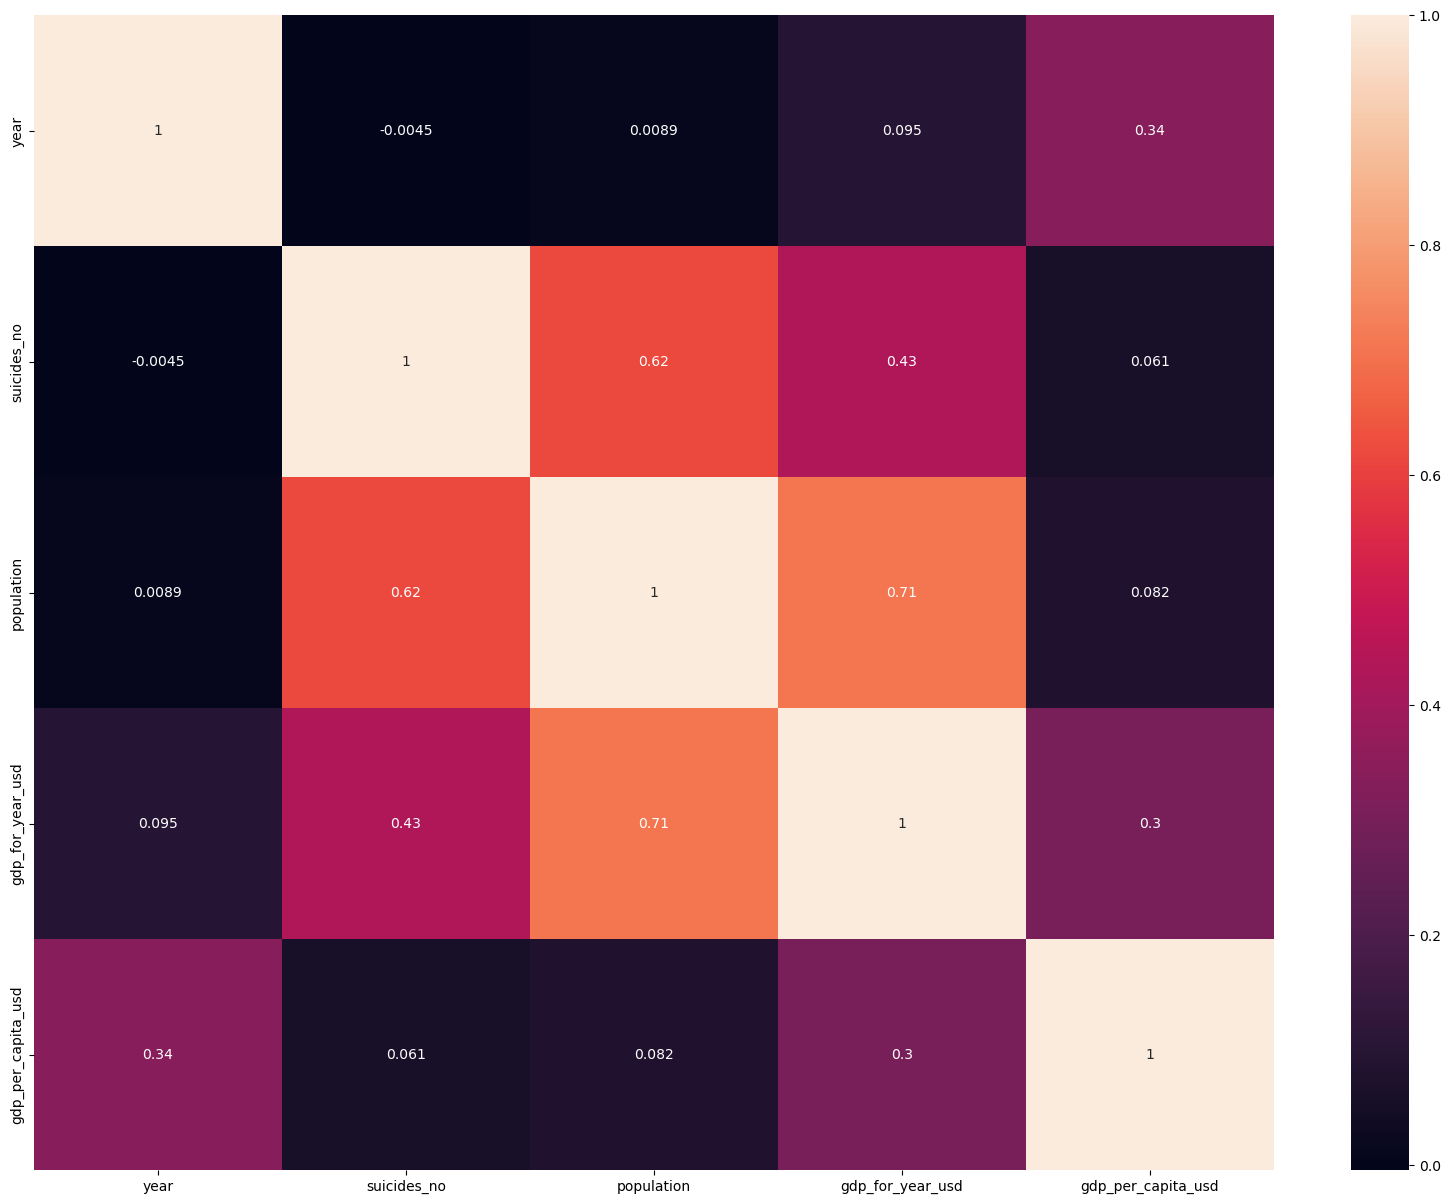

In [17]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [27]:
df.generation.replace(['Boomers', 'Generation X', 'Generation Z', 'G.I. Generation', 'Millenials', 'Silent'], 
                        ['0', '1', '2', '3', '4', '5'], inplace=True)

df.sex.replace(['male', 'female'], ['0', '1'], inplace=True)

def means(arr):
    return str(np.array(arr).mean())
df.age.replace(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'], 
                 [means([15, 24]), means([25, 34]), means([35, 54]), 
                  means([5, 14]), means([55, 74]), means([75])], inplace=True)
df = df.drop(['country'],axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler
cols = df.columns
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=cols)
df.head()

,year,sex,age,suicides_no,population,gdp_for_year_usd,gdp_per_capita_usd,generation
0,-1.683615,-1.0,-0.893081,-0.245639,-0.391617,-0.305056,-0.850864,-0.855724
1,-1.683615,-1.0,0.172535,-0.251182,-0.392870,-0.305056,-0.850864,1.262458
2,-1.683615,1.0,-0.893081,-0.253400,-0.397548,-0.305056,-0.850864,-0.855724
3,-1.683615,-1.0,1.472585,-0.267811,-0.466035,-0.305056,-0.850864,0.203367
4,-1.683615,-1.0,-0.466834,-0.258943,-0.401485,-0.305056,-0.850864,-1.385269


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [34]:
x = df.drop(["suicides_no"],axis=1)
y = df['suicides_no']

In [35]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3)
print(train_x.shape, train_y.shape)
print(test_y.shape, test_x.shape)
print(train_x.head())

(19474, 7) (19474,)
(8346,) (8346, 7)
           year  sex       age  population  gdp_for_year_usd  \
2090   1.032203 -1.0 -0.466834   -0.332798         -0.036935   
16247 -1.329378 -1.0 -0.893081   -0.446427         -0.304714   
11082 -1.447457  1.0  1.025027   -0.465124         -0.306278   
22539 -0.620904  1.0 -0.466834   -0.397727         -0.240218   
1834  -1.447457 -1.0  1.472585   -0.429077         -0.214969   

       gdp_per_capita_usd  generation  
2090             1.710919   -0.855724  
16247           -0.743701   -0.855724  
11082           -0.862247    0.203367  
22539            0.914985   -0.855724  
1834             0.088818    0.203367  


In [36]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

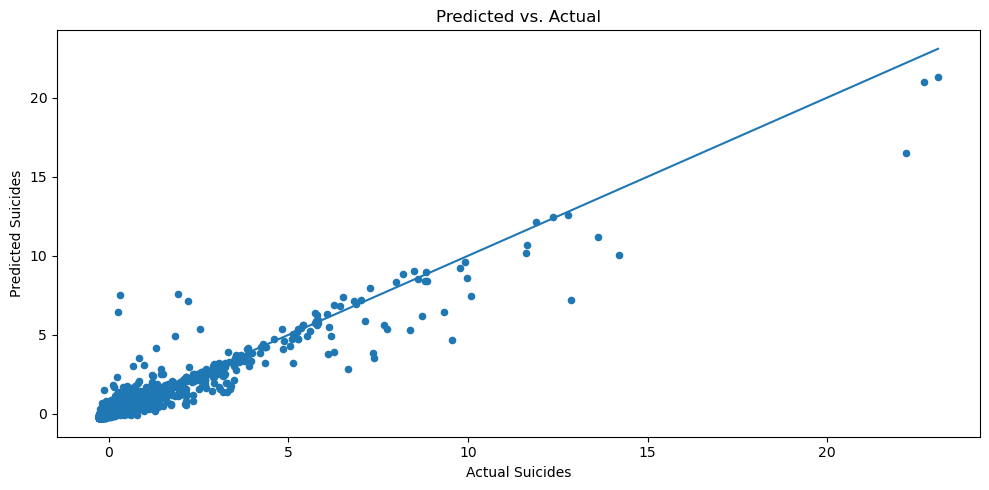

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(test_y, pred_y, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Suicides')
plt.ylabel('Predicted Suicides')

plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)])
plt.tight_layout()

In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print('R2 Score:', metrics.r2_score(test_y, pred_y))


Mean Absolute Error: 0.060626256687569186
Mean Squared Error: 0.07016200104857431
Root Mean Squared Error: 0.2648811073832453
R2 Score: 0.9240709367247565
